In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from ta import *
import pywt
%matplotlib inline

In [423]:
from keras.layers import Input, Dense, BatchNormalization, Dropout, LSTM, TimeDistributed, Reshape, Activation, \
    LeakyReLU, Bidirectional
from keras.optimizers import SGD, Adam
from keras.models import Model, Sequential
from keras.metrics import categorical_accuracy

def create_1sae_lstm_model(timestep, input_size, lstm_output_size):
    input_prices = Input(shape = (timestep, input_size))
    encoded1_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(input_prices)    
    
    lstm = LSTM(lstm_output_size, activation = 'sigmoid')(encoded1_da)
    dense = Dense(1, activation = 'sigmoid')(lstm)

    opt = Adam(0.002)
    model = Model(inputs = input_prices, outputs = dense)

    model.compile(loss='mae', optimizer = opt, metrics=['mae'])
    
    return model

In [602]:
from keras.layers import Input, Dense, BatchNormalization, Dropout, LSTM, TimeDistributed, Reshape, Activation, \
    LeakyReLU, Bidirectional
from keras.optimizers import SGD, Adam
from keras.models import Model, Sequential
from keras.metrics import categorical_accuracy

def create_2sae_lstm_model(timestep, input_size, lstm_output_size):
    input_prices = Input(shape = (timestep, input_size))
    encoded1_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(input_prices)   
    encoded2_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(encoded1_da)    
    lstm = LSTM(1, activation = 'sigmoid')(encoded2_da)
  
    model = Model(inputs = input_prices, outputs = lstm)

    opt = Adam(0.002)
    model.compile(loss='mae', optimizer = opt, metrics=['mae'])
    
    return model

In [595]:
from keras.layers import Input, Dense, BatchNormalization, Dropout, LSTM, TimeDistributed, Reshape, Activation, \
    LeakyReLU, Bidirectional
from keras.optimizers import SGD, Adam
from keras.models import Model, Sequential
from keras.metrics import categorical_accuracy

def create_5sae_lstm_model(timestep, input_size, lstm_output_size):
    input_prices = Input(shape = (timestep, input_size))
    encoded1_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(input_prices)   
    encoded2_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(encoded1_da)    
    encoded3_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(encoded2_da)    
    encoded4_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(encoded3_da)
    encoded5_da = TimeDistributed(Dense(hidden_layer_size, activation = 'sigmoid'))(encoded4_da)    
    lstm = LSTM(1, activation = 'sigmoid')(encoded5_da)
  
    model = Model(inputs = input_prices, outputs = lstm)

    opt = Adam(0.002)
    model.compile(loss='mae', optimizer = opt, metrics=['mae'])
    
    return model

In [508]:
from keras.layers import Input, Dense, BatchNormalization, Dropout, LSTM, TimeDistributed, Reshape, Activation, \
    LeakyReLU, Bidirectional
from keras.optimizers import SGD, Adam
from keras.models import Model, Sequential
from keras.metrics import categorical_accuracy

def create_lstm_model(timestep, input_size, lstm_output_size):
    input_prices = Input(shape = (timestep, input_size))   
    lstm = LSTM(1, activation = 'sigmoid')(input_prices)
    
    
    model = Model(inputs = input_prices, outputs = lstm)

    opt = Adam(0.002)
    model.compile(loss='mae', optimizer = opt, metrics=['mae'])
    
    return model

In [668]:
from keras.layers import Conv1D, MaxPooling1D

def create_cnn_lstm_model(timestep, input_size, lstm_output_size):
    input_prices = Input(shape = (timestep, input_size))
    conv1 = Conv1D(9,4)(input_prices)    
    
    lstm = LSTM(1, activation = 'sigmoid')(conv1)
    
    model = Model(inputs = input_prices, outputs = lstm)

    opt = Adam(0.002)
    model.compile(loss='mae', optimizer = opt, metrics=['mae'])
    
    return model

## Parameters

In [6]:
input_size = 14
hidden_layer_size = 9
test_perc = 0.1
timestep = 4
lstm_output_size = 10

## Load data and define model

In [18]:
df = read_data('Nifty500.csv', False)
(cA, cD) = pywt.dwt(df.values, 'haar')
vals = np.array([np.append(cA[i], cD[i]) for i in range(cA.shape[0])])
closePriceScaler = MinMaxScaler(feature_range=(0, 1))
X_train, X_test, Y_train, Y_test = split_dataset(vals, 1500, 2400, closePriceScaler, test_perc, timestep)

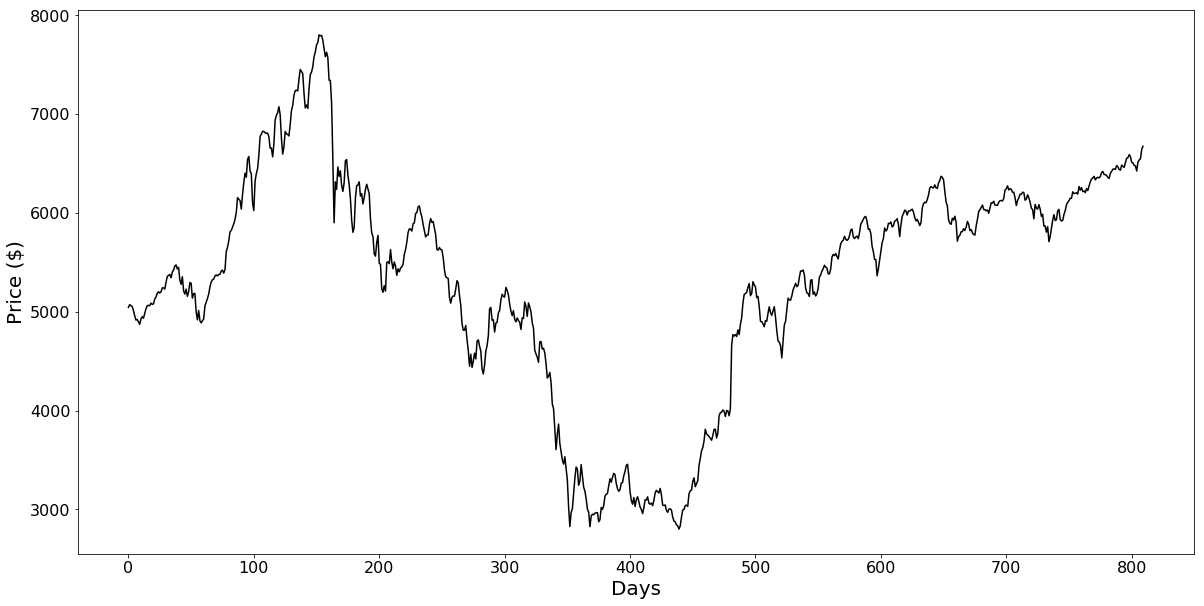

In [19]:
y = transform_to_original(Y_train, closePriceScaler)
fig, ax = plt.subplots(figsize=(20, 10))
p1, = ax.plot(y, 'black')

ax.set_ylabel('Price ($)', fontsize=20)
ax.set_xlabel('Days', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig('train-1.png')
plt.show()

## Train

In [788]:
model = create_lstm_model(timestep, input_size, lstm_output_size)

In [798]:
model = create_2sae_lstm_model(timestep, input_size, lstm_output_size)

In [801]:
model = create_5sae_lstm_model(timestep, input_size, lstm_output_size)

In [804]:
model = create_cnn_lstm_model(timestep, input_size, lstm_output_size)

In [693]:
model.fit(X_train, Y_train,
                 epochs = 5000, batch_size = 60,
                  verbose=2,
                 validation_split=0.1,
                 shuffle = False)

Train on 810 samples, validate on 90 samples
Epoch 1/5000
 - 9s - loss: 0.0959 - mean_absolute_error: 0.0959 - val_loss: 0.1540 - val_mean_absolute_error: 0.1540
Epoch 2/5000
 - 0s - loss: 0.0937 - mean_absolute_error: 0.0937 - val_loss: 0.1495 - val_mean_absolute_error: 0.1495
Epoch 3/5000
 - 0s - loss: 0.0929 - mean_absolute_error: 0.0929 - val_loss: 0.1456 - val_mean_absolute_error: 0.1456
Epoch 4/5000
 - 0s - loss: 0.0924 - mean_absolute_error: 0.0924 - val_loss: 0.1430 - val_mean_absolute_error: 0.1430
Epoch 5/5000
 - 0s - loss: 0.0920 - mean_absolute_error: 0.0920 - val_loss: 0.1413 - val_mean_absolute_error: 0.1413
Epoch 6/5000
 - 0s - loss: 0.0914 - mean_absolute_error: 0.0914 - val_loss: 0.1401 - val_mean_absolute_error: 0.1401
Epoch 7/5000
 - 0s - loss: 0.0908 - mean_absolute_error: 0.0908 - val_loss: 0.1392 - val_mean_absolute_error: 0.1392
Epoch 8/5000
 - 0s - loss: 0.0903 - mean_absolute_error: 0.0903 - val_loss: 0.1383 - val_mean_absolute_error: 0.1383
Epoch 9/5000


KeyboardInterrupt: 

In [805]:
model.load_weights("cnn-1500-2500.h5")

In [797]:
predls = model.predict(X_test)

In [800]:
pred2 = model.predict(X_test)

In [803]:
pred5 = model.predict(X_test)

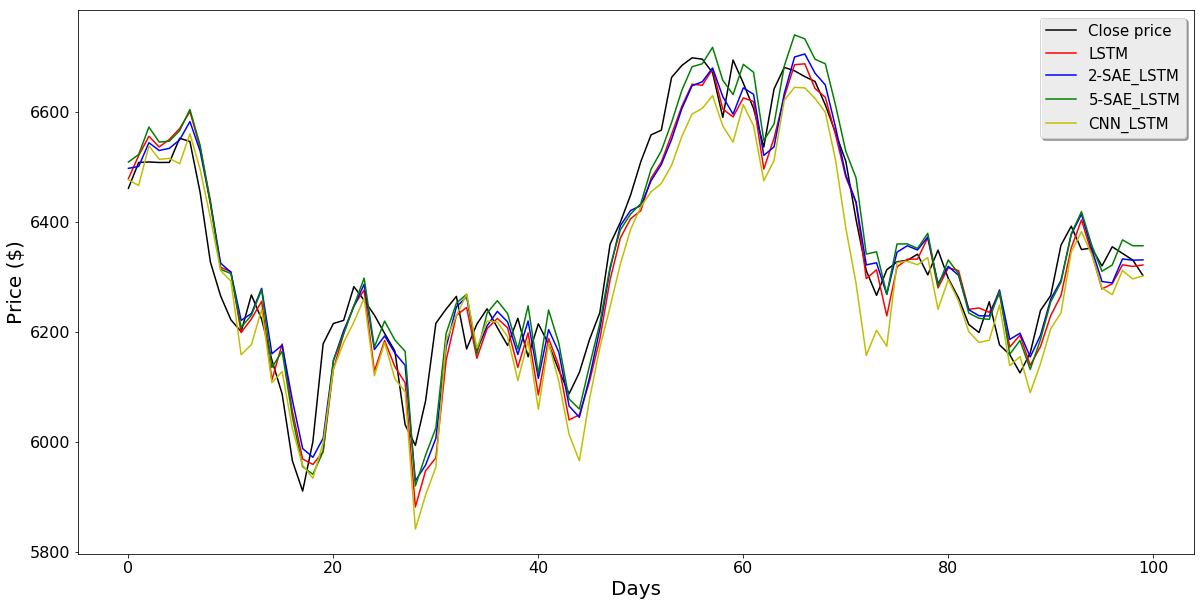

In [807]:


fig, ax = plt.subplots(figsize=(20, 10))

predls = transform_to_original(predls, closePriceScaler)
pred2 = transform_to_original(pred2, closePriceScaler)
pred5 = transform_to_original(pred5, closePriceScaler)
predcnn = transform_to_original(predcnn, closePriceScaler)
y = transform_to_original(Y_test, closePriceScaler)

p1, = ax.plot(y, 'black')
p2, = ax.plot(predls, 'r')
p3, = ax.plot(pred2, 'b')
p4, = ax.plot(pred5, 'g')
p5, = ax.plot(predcnn, 'y')
ax.legend((p1 , p2, p3, p4, p5), ('Close price', 'LSTM', '2-SAE_LSTM', '5-SAE_LSTM', 'CNN_LSTM'), loc='upper right', shadow=True, prop={'size': 15})
ax.set_ylabel('Price ($)', fontsize=20)
ax.set_xlabel('Days', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig('nifty-1.png')
plt.show()

## Visualize result

MAE:  0.00404135441524619
MeAE:  0.0034177618556476275
R2:  0.885868133514856


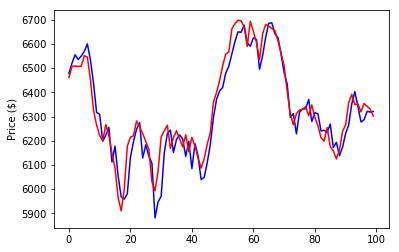

In [753]:
pred = model.predict(X_test)

MAE, MeAE, R2 = genereate_metrics(Y_test, pred)

pred = transform_to_original(pred, closePriceScaler)
y = transform_to_original(Y_test, closePriceScaler)

print('MAE: ', MAE)
print('MeAE: ', MeAE)
print('R2: ', R2)

plt.plot(pred, 'b')
plt.plot(y, 'r')
plt.ylabel('Price ($)')
plt.show()

In [740]:
print(test_profitability(y, pred))

(-28.167207945662142, 39, 60, 7.693729727912897)


In [747]:
periods = [[1500, 2500], [2100, 3100], [3100, 4100]]
results = test_on_periods('cnn', create_cnn_lstm_model(timestep, input_size, lstm_output_size), periods, 'Nifty500.csv')

In [748]:
print(results)

[{'start': 1500, 'end': 2500, 'MAE': 0.004997977353203894, 'MeAE': 0.003810872491554873, 'R2': 0.8241105058603869, 'Profitability': (-10.662765113317352, 48, 51, -2.4543872514146097)}, {'start': 2100, 'end': 3100, 'MAE': 0.004357856410063529, 'MeAE': 0.003959487699344788, 'R2': 0.9306985836596439, 'Profitability': (-15.237689355722031, 38, 61, 7.693729727912897)}, {'start': 3100, 'end': 4100, 'MAE': 0.19514593688817353, 'MeAE': 0.1891227766946565, 'R2': -59.355021675994095, 'Profitability': (-11.404576886915564, 33, 66, 9.720665421225847)}]


In [695]:
def test_on_periods(name, create_model, periods, file_name):
    results = []
    df = read_data(file_name, False)
    (cA, cD) = pywt.dwt(df.values, 'haar')
    vals = np.array([np.append(cA[i], cD[i]) for i in range(cA.shape[0])])    
    closePriceScaler = MinMaxScaler(feature_range=(0, 1))
    for p in periods:
        X_train, X_test, Y_train, Y_test = split_dataset(vals, p[0], p[1], closePriceScaler, test_perc, timestep)
        model = create_model
        model.fit(X_train, Y_train,
                 epochs = 5000, batch_size = 60,
                  verbose=0,
                 validation_split=0.1,
                 shuffle = False)
        pred = model.predict(X_test)

        MAE, MeAE, R2 = genereate_metrics(Y_test, pred)

        pred = transform_to_original(pred, closePriceScaler)
        y = transform_to_original(Y_test, closePriceScaler)
        
        profitability = test_profitability(y, pred)
        
        model.save_weights("{0}-{1}-{2}.h5".format(name, p[0], p[1]))
        results.append({
            'start': p[0],
            'end': p[1],
            'MAE': MAE,
            'MeAE': MeAE,
            'R2': R2,
            'Profitability': profitability
        })
        
    return results

## Preprocessing

In [2]:
def read_data(fileName, floats):
    data = pd.read_csv(fileName)
    if not floats:
        data_proc = [[float(x.replace(",", "")) for x in reversed(data['Price'].values)],
                     [float(x.replace(",", "")) for x in reversed(data['High'].values)],
                     [float(x.replace(",", "")) for x in reversed(data['Low'].values)]]
    else:
        data_proc = [[x for x in reversed(data['Price'].values)],
                     [x for x in reversed(data['High'].values)],
                     [x for x in reversed(data['Low'].values)]]

    df = pd.DataFrame(data=np.array(data_proc).T.tolist(), columns=['Close', 'High', 'Low'])
    df = utils.dropna(df)

    df['MACD'] = macd(df['Close'], n_fast=12, n_slow=26, fillna=True)  #3
    df['CCI'] = cci(df['High'], df['Low'], df['Close'], n=20, c=0.015, fillna=True)
    df['ATR'] = average_true_range(df['High'], df['Low'], df['Close'], n=14, fillna=True) #5
    df['BOLL'] = bollinger_hband(df["Close"], n=20, ndev=2, fillna=True)
    df['EMA20'] = ema(df["Close"], n=20, fillna=True) #7
    df['SMA'] = stoch_signal(df['High'], df['Low'], df['Close'], n=14, d_n=5, fillna=True)
    df['AwesomeOscilator'] = ao(df['High'], df['Low'], s=5, l=34, fillna=True) #9
    df['RSI'] = rsi(df["Close"], n=14, fillna=True)
    df['StohOscilator'] = stoch(df['High'], df['Low'], df['Close'], n=14, fillna=True) #11
    df['UltimateOscilator'] = uo(df['High'], df['Low'], df['Close'], s=7, m=14, l=28, ws=4.0, wm=2.0, wl=1.0,
                                 fillna=True)
    df['WR'] = wr(df['High'], df['Low'], df['Close'], lbp=14, fillna=True)

    return df

In [ ]:
def plot(var):
    plt.plot(var, 'b')
    plt.ylabel('Price ($)')
    plt.show()

In [4]:
def split_dataset(val, start, end, closePriceScaler, test_perc=0.3, timestep=5):
    X = np.array(val)
    nr_train = int(len(X.T[0]) * (1-test_perc))  
    Y = X.T[0]

    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X = X[:-1]
    X = [[X[batch_nr - t] for t in reversed(range(timestep))] for batch_nr in range(timestep, len(X))]
    X = np.array(X)

    Y = closePriceScaler.fit_transform(np.array(Y).reshape(-1,1))
    Y = Y[timestep+1:]
   
    nr_train = int((end-start) * (1-test_perc))  

    Y_train = Y[start:start+nr_train]
    Y_test = Y[start+nr_train:end]

    X_train = X[start:start+nr_train]
    X_test = X[start+nr_train:end]

    return X_train, X_test, Y_train, Y_test

In [6]:
def split_dataset_random(df, start, end, closePriceScaler, test_perc=0.3, timestep=5):
    X = np.array(df.values)
    nr_train = int(len(X.T[0]) * (1-test_perc))  
    Y = X.T[0]


    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)

    X = X[:-1]
    X = [[X[batch_nr - t] for t in reversed(range(timestep))] for batch_nr in range(timestep, len(X))]
    X = np.array(X)

    Y = closePriceScaler.fit_transform(np.array(Y).reshape(-1,1))
    Y = Y[timestep+1:]

    p = np.random.permutation(X.shape[0])
    X = X[p]
    Y=Y[p]

    nr_train = int(X.shape[0] * (1-test_perc))  

    Y_train = Y[start:start+nr_train]
    Y_test = Y[start+nr_train:end]

    X_train = X[start:start+nr_train]
    X_test = X[start+nr_train:end]

    return X_train, X_test, Y_train, Y_test

In [5]:
from sklearn import metrics

def genereate_metrics(y, pred):
    MAE = metrics.mean_absolute_error(y, pred)
    MeAE = metrics.median_absolute_error(y, pred)
    R2 = metrics.r2_score(y, pred)  
    return MAE,MeAE, R2

In [16]:
def transform_to_original(val, closePriceScaler):
    return closePriceScaler.inverse_transform(val.reshape(-1,1)).ravel() 

In [691]:
def test_profitability(y, pred, B = -0.0001, S=-0.0001):
    R = 0

    good_deals = 0
    bad_deals = 0
    bah = ((y[-1] - y[0]) / y[0]) * 100

    for i in range(len(y)-1):
        add = 0
        if pred[i] > y[i]:
            add += (y[i+1] - y[i] + y[i] * B + y[i+1]*S)/y[i]
        else:
            add += (y[i] - y[i+1] + y[i+1] * B + y[i]*S)/y[i]

        if add > 0:
            good_deals += 1 
        else:
            bad_deals +=1
        R += add

    R *= 100
    
    return R, good_deals, bad_deals, bah

### VIsualization helpers

In [684]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

def generate_model_image(model):
    SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))
    
SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))
plot_model(model, show_shapes=True, show_layer_names=False, to_file='model.png')

In [ ]:
df = read_data('500Futures.csv', False)
fig, ax = plt.subplots(figsize=(20, 10))

p1, = ax.plot(df.values.T[0][0:365], 'b')
p2, = ax.plot(df.values.T[7][0:365], 'r')
ax.legend((p1 , p2, p3), ('Close price', 'Exponential Moving Average (EMA)'), loc='upper right', shadow=True, prop={'size': 15})
ax.set_ylabel('Price ($)', fontsize=20)
ax.set_xlabel('Days', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig('fts.png')
plt.show()